# 🔎 Exploratory Data Analysis (EDA)

An Exploratory Data Analysis (EDA) was conducted to understand the structure and relationships within the 2019 cross-sectional dataset.

📊 1. Descriptive Statistics  
Key variables (CO₂ emissions, GDP, HDI, Life Expectancy, GII) were summarized using standard descriptive measures.  
This showed strong right-skewness in CO₂ and GDP, while HDI and Life Expectancy displayed much more stable ranges.

📈 2. Pairwise Distribution Analysis  
A pairplot was used to visualize variable distributions (via KDE on the diagonal) and pairwise scatter relationships.  
This helped identify initial trends between economic, environmental, and social indicators.

🖼️ 3. Visualization  
Several plots were generated to explore cross-country patterns:
• Correlation heatmap of all key variables  
• Pairwise scatter plots (CO₂–GDP, GDP–Life Expectancy, GDP–GII, CO₂–HDI)  
• Bar charts of top CO₂ emitters and highest-HDI countries  
• Boxplots comparing CO₂ emissions and HDI across continents

These visualizations revealed clustering in GDP–Life Expectancy and large cross-regional variation in CO₂ emissions.

🔗 4. Correlation Analysis  
Pearson and Spearman coefficients were computed to assess linear and monotonic relationships.  
This provided early evidence about which hypotheses were likely to be supported.

📝 Overall, the EDA highlighted meaningful structural patterns—such as a moderate positive GDP–Life Expectancy association and a weak CO₂–GDP link—setting the foundation for the hypothesis testing stage.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv("master_cross_section.csv")

if "iso_code" in df.columns:
    df = df.rename(columns={"iso_code": "ISO3"})

recent = df[df["Year"] == 2019].copy()

corr_vars = ["CO2_total", "GDP", "HDI", "LifeExpectancy", "GII"]

recent_complete = recent.dropna(subset=corr_vars)

print("Columns:", df.columns.tolist())
print("Number of 2019 rows:", len(recent))
print("Missing values for correlation variables:")
print(recent[corr_vars].isna().sum())
print("Complete-case subset size:", len(recent_complete))


Columns: ['ISO3', 'Country', 'Year', 'population', 'CO2_total', 'CO2_per_capita', 'CO2_per_GDP', 'GDP', 'HDI', 'LifeExpectancy', 'GII', 'GDP_per_capita']
Number of 2019 rows: 185
Missing values for correlation variables:
CO2_total          0
GDP                0
HDI                0
LifeExpectancy     0
GII               18
dtype: int64
Complete-case subset size: 167


## 1. Correlation Heatmap

This heatmap visualizes pairwise correlations between CO₂ emissions, GDP, HDI, Life Expectancy, and GII for the year 2019.

It helps identify initial linear patterns before performing hypothesis tests.


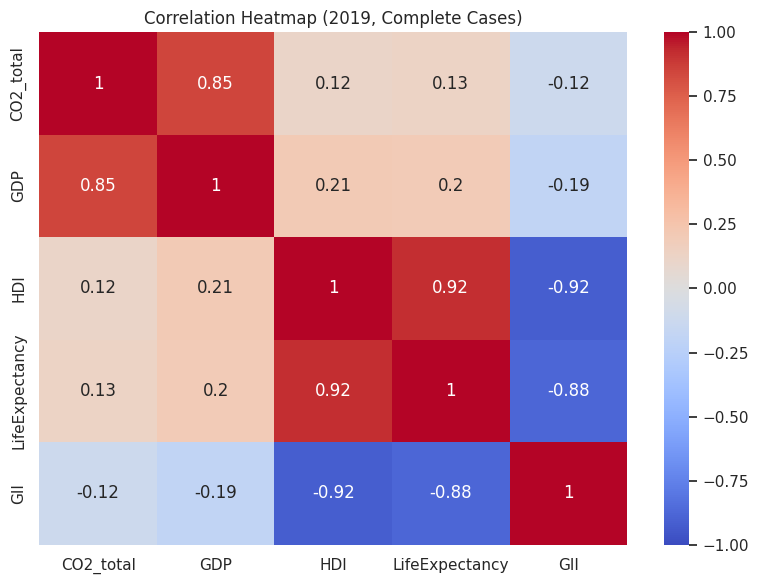

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(recent_complete[corr_vars].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (2019, Complete Cases)")
plt.tight_layout()
plt.show()

## 2. Pairwise Scatter Plots

This plot shows scatter relationships for all pairs of CO₂–GDP–HDI–LifeExpectancy–GII variables.

Diagonal KDE curves show distribution shapes, helping detect skewness and clustering patterns.


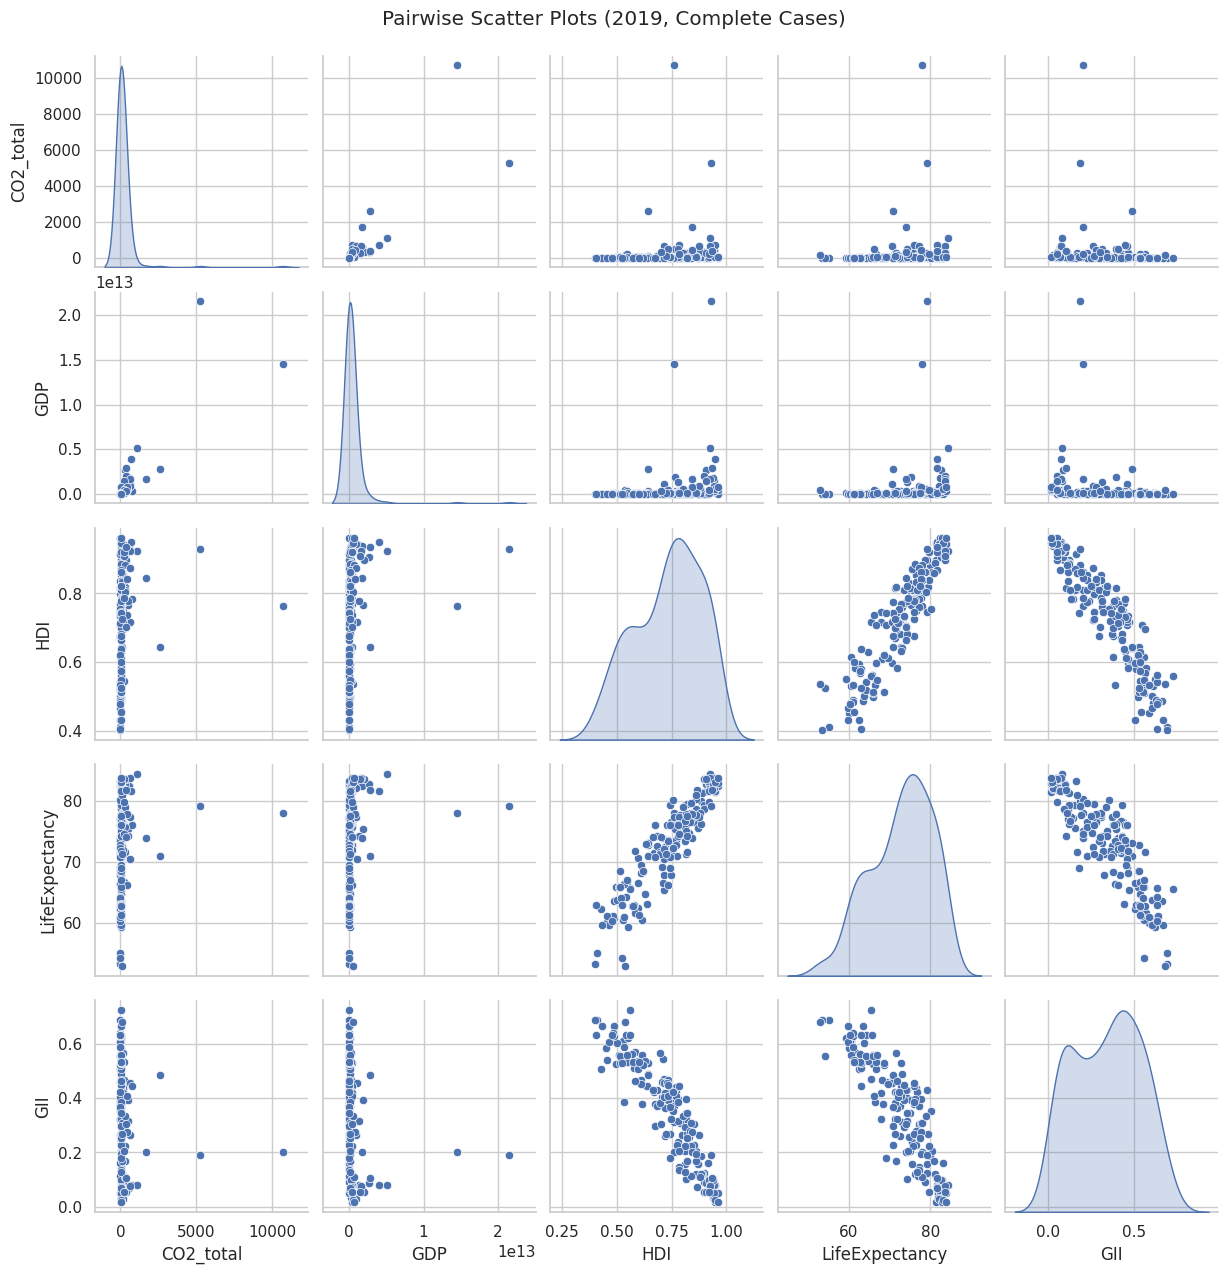

In [5]:
sns.pairplot(recent_complete[corr_vars], diag_kind="kde")
plt.suptitle("Pairwise Scatter Plots (2019, Complete Cases)", y=1.02)
plt.show()

### 3A. Top 20 CO₂ Emitters

This bar chart ranks the top 20 countries by total CO₂ emissions in 2019.


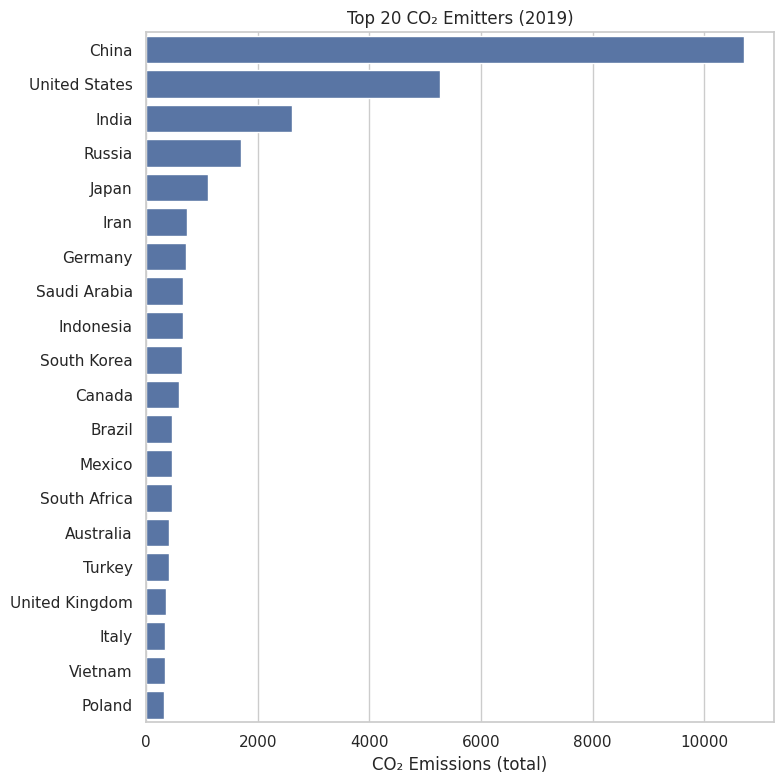

In [6]:
top_co2 = recent.sort_values("CO2_total", ascending=False).head(20)
plt.figure(figsize=(8, 8))
sns.barplot(y="Country", x="CO2_total", data=top_co2)
plt.title("Top 20 CO₂ Emitters (2019)")
plt.xlabel("CO₂ Emissions (total)")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 3B. Top 20 Countries by HDI

This plot shows the 20 countries with the highest Human Development Index (HDI) values in 2019.


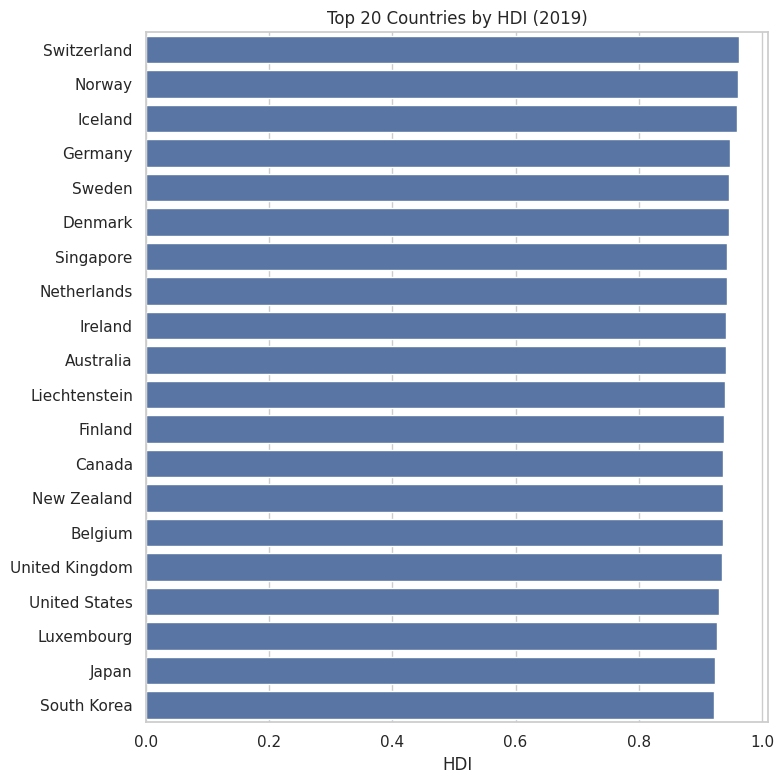

In [7]:
top_hdi = recent.sort_values("HDI", ascending=False).head(20)
plt.figure(figsize=(8, 8))
sns.barplot(y="Country", x="HDI", data=top_hdi)
plt.title("Top 20 Countries by HDI (2019)")
plt.xlabel("HDI")
plt.ylabel("")
plt.tight_layout()
plt.show()

## 4. Continent-Level Boxplots

These boxplots compare key indicators (CO₂ emissions, HDI, Life Expectancy, GDP, GDP per Capita, and GII) across continents.

The continent-level comparison reveals clear regional patterns:
- Europe and Oceania show higher HDI and Life Expectancy.
- Asia and North America include the highest CO₂-emitting countries.
- Africa generally exhibits lower HDI and Life Expectancy, along with higher Gender Inequality.
- GDP and GDP per Capita differ significantly by region, with Europe and Oceania on the higher end and Africa on the lower end.

These patterns highlight how development, inequality, and environmental impact vary across global regions.


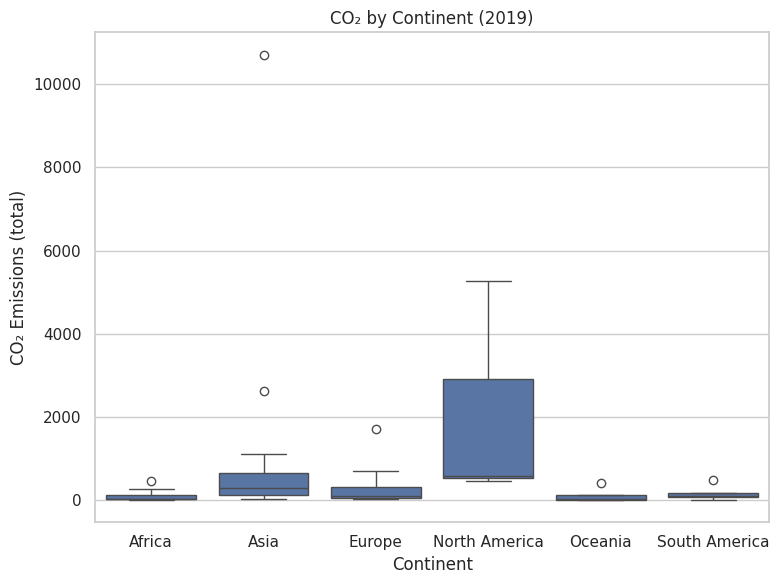

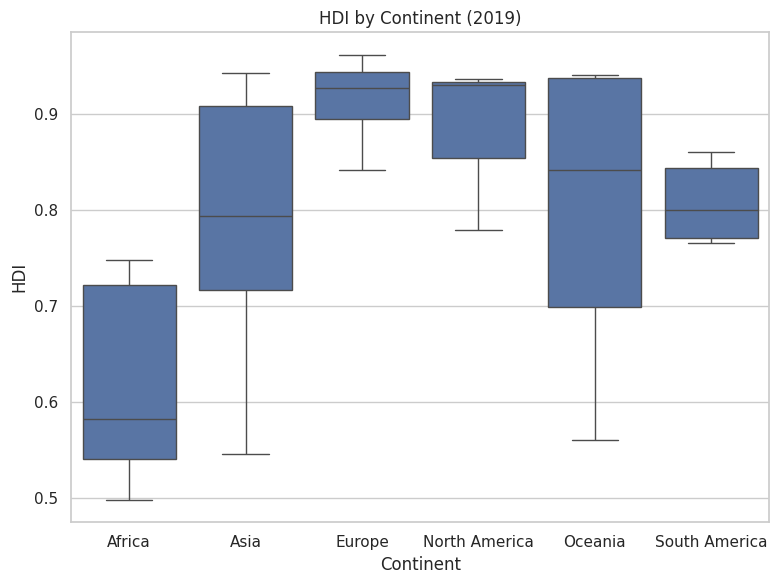

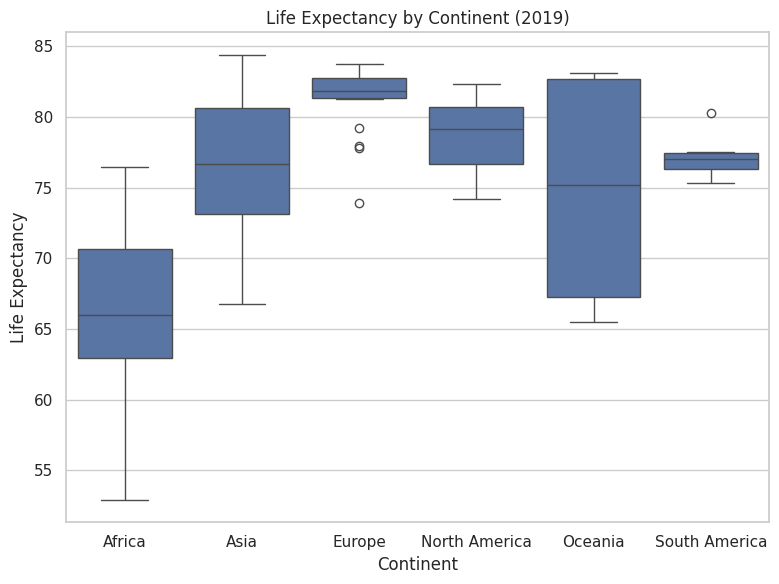

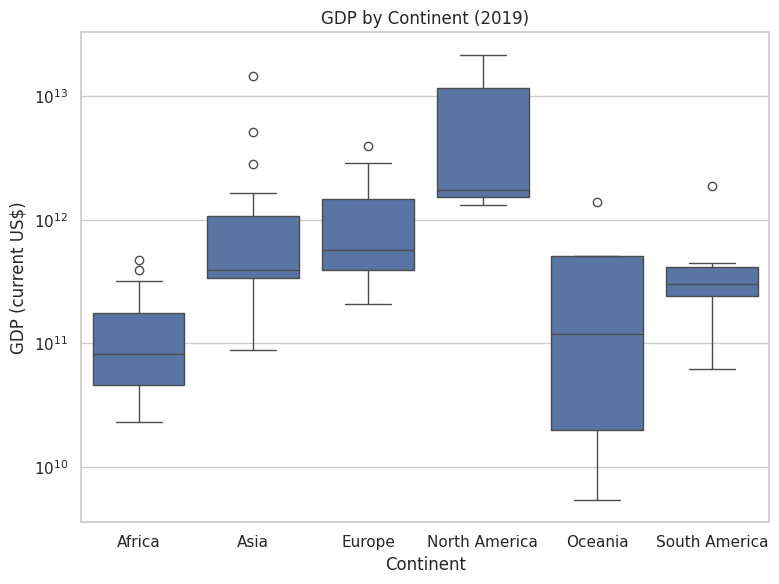

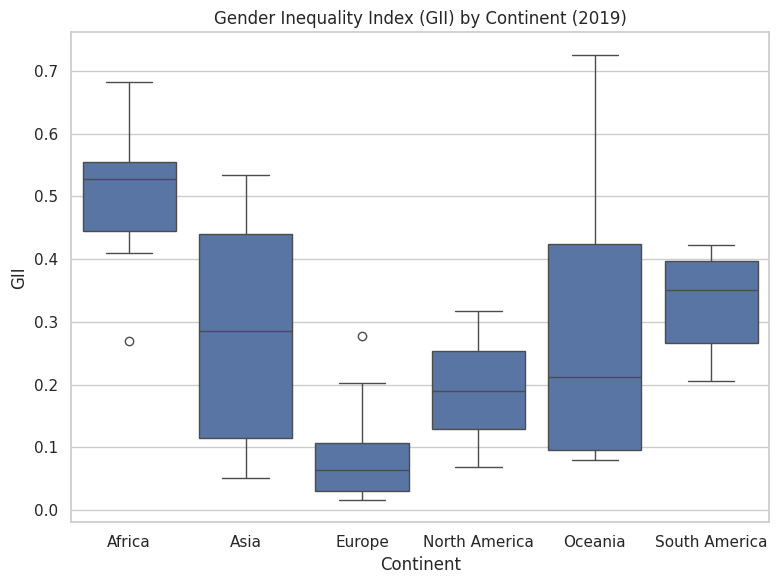

In [34]:

continent_map = {
    "TUR":"Europe","DEU":"Europe","FRA":"Europe","ESP":"Europe","ITA":"Europe",
    "GBR":"Europe","NLD":"Europe","BEL":"Europe","SWE":"Europe","NOR":"Europe",
    "FIN":"Europe","POL":"Europe","RUS":"Europe","CHE":"Europe","AUT":"Europe",
    "GRC":"Europe","PRT":"Europe","IRL":"Europe","DNK":"Europe","CZE":"Europe",

    "USA":"North America","CAN":"North America","MEX":"North America",

    "BRA":"South America","ARG":"South America","CHL":"South America",
    "COL":"South America","PER":"South America","URY":"South America",

    "CHN":"Asia","JPN":"Asia","KOR":"Asia","IND":"Asia","IDN":"Asia","THA":"Asia",
    "VNM":"Asia","PHL":"Asia","MYS":"Asia","SGP":"Asia","PAK":"Asia","IRN":"Asia",
    "SAU":"Asia","ARE":"Asia","QAT":"Asia","ISR":"Asia","BGD":"Asia","LKA":"Asia",

    "ZAF":"Africa","EGY":"Africa","NGA":"Africa","KEN":"Africa","ETH":"Africa",
    "DZA":"Africa","MAR":"Africa","TUN":"Africa","GHA":"Africa","TZA":"Africa",
    "UGA":"Africa","CMR":"Africa","CIV":"Africa","SEN":"Africa",

    "AUS":"Oceania","NZL":"Oceania","FJI":"Oceania","PNG":"Oceania"
}


recent["Continent"] = recent["ISO3"].map(continent_map)
recent_cont = recent.dropna(subset=["Continent"])


# 1.CO2
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="CO2_total", data=recent_cont,
            order=sorted(recent_cont["Continent"].unique()))
plt.title("CO₂ by Continent (2019)")
plt.xlabel("Continent")
plt.ylabel("CO₂ Emissions (total)")
plt.tight_layout()
plt.show()

# 2.HDI
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="HDI", data=recent_cont,
            order=sorted(recent_cont["Continent"].unique()))
plt.title("HDI by Continent (2019)")
plt.xlabel("Continent")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()

# 3. Life Expectancy
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="LifeExpectancy", data=recent_cont,
            order=sorted(recent_cont["Continent"].unique()))
plt.title("Life Expectancy by Continent (2019)")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()

# 4. GDP
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="GDP", data=recent_cont,
            order=sorted(recent_cont["Continent"].unique()))
plt.title("GDP by Continent (2019)")
plt.xlabel("Continent")
plt.ylabel("GDP (current US$)")
plt.yscale("log")
plt.tight_layout()
plt.show()

# 5. GII (Gender Inequality Index)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Continent", y="GII", data=recent_cont,
            order=sorted(recent_cont["Continent"].unique()))
plt.title("Gender Inequality Index (GII) by Continent (2019)")
plt.xlabel("Continent")
plt.ylabel("GII")
plt.tight_layout()
plt.show()


## 5. Hypothesis Testing

This section performs Pearson and Spearman correlation tests for the four hypotheses:

H1: CO₂ → GDP (expected positive)  
H2: GDP → Life Expectancy (expected positive)  
H3: GDP → GII (expected negative)  
H4: CO₂ → HDI (expected negative)

📌 Hypothesis Testing Framework

To evaluate the statistical relationships between environmental, economic, and development indicators, four hypotheses were tested using the clean 2019 cross-sectional dataset.

For each hypothesis, we compare a Null Hypothesis (H₀) and an Alternative Hypothesis (H₁):

🔵 Null Hypothesis (H₀)  
There is no statistically significant relationship between the two variables being tested.  
Any observed association is assumed to be due to random variation rather than a true underlying effect.

🔴 Alternative Hypothesis (H₁)  
There is a statistically significant relationship between the variables, meaning that changes in one indicator may be systematically associated with changes in the other.

📏 Decision Rule (p-value)  
• If p-value < 0.05 → Reject H₀ (significant relationship exists)  
• If p-value ≥ 0.05 → Fail to reject H₀ (no significant relationship detected)

Expected directional relationships (positive or negative) were also considered based on development theory and existing literature on economic growth and environmental sustainability.


In [33]:
def correlation_test(df_, x, y, name, expected_direction=None):
    """
    df_   : dataframe (recent_complete)
    x, y  : variables
    name  : hypothesis names
    expected_direction : 'positive', 'negative' or None
    """
    clean = df_[[x, y]].dropna()
    pear = pearsonr(clean[x], clean[y])
    spear = spearmanr(clean[x], clean[y])

    r_p = pear[0]
    p_p = pear[1]

    print(" ")
    print("=========================================")
    print(f"Hypothesis Test: {name}")
    print("-----------------------------------------")
    print(f"Pearson:  r = {r_p:.3f}, p = {p_p:.4f}")
    print(f"Spearman: r = {spear[0]:.3f}, p = {spear[1]:.4f}")

    if p_p < 0.05:
        print("→ Statistically significant (reject H₀).")
        sig = True
        decision = "H₀ Reject"
    else:
        print("→ Not statistically significant (fail to reject H₀).")
        sig = False
        decision = "H₀ Accept"

    if expected_direction is not None:
        if expected_direction == "positive":
            if r_p > 0:
                direction_ok = "OK (same direction as expected)"
            else:
                direction_ok = "Opposite direction of expectation"
        elif expected_direction == "negative":
            if r_p < 0:
                direction_ok = "OK (same direction as expected)"
            else:
                direction_ok = "Opposite direction of expectation"
        else:
            direction_ok = "No direction expectation"
        print("Direction check:", direction_ok)
    else:
        sig = sig
    return {
        "name": name,
        "r": r_p,
        "p": p_p,
        "significant": sig,
        "expected_direction": expected_direction,
        "decision": decision
    }
results = []
# H1: CO₂–GDP Relationship (expected positive)
results.append( correlation_test(recent_complete, "CO2_total", "GDP", "H1: CO₂ vs GDP (expected positive)", "positive")
)
# H2: GDP–Life Expectancy Relationship (expected positive)
results.append(correlation_test(recent_complete, "GDP", "LifeExpectancy", "H2: GDP vs Life Expectancy (expected positive)", "positive")
)
# H3: GDP–GII Relationship (expected negative)
results.append( correlation_test(recent_complete, "GDP", "GII","H3: GDP vs GII (expected negative)", "negative")
)
# H4: CO₂–HDI Relationship (expected negative)
results.append(correlation_test(recent_complete, "CO2_total", "HDI", "H4: CO₂ vs HDI (expected negative)", "negative")
)
results_df.to_csv("hypothesis_results_2019.csv", index=False)

 
Hypothesis Test: H1: CO₂ vs GDP (expected positive)
-----------------------------------------
Pearson:  r = 0.847, p = 0.0000
Spearman: r = 0.929, p = 0.0000
→ Statistically significant (reject H₀).
Direction check: OK (same direction as expected)
 
Hypothesis Test: H2: GDP vs Life Expectancy (expected positive)
-----------------------------------------
Pearson:  r = 0.199, p = 0.0098
Spearman: r = 0.570, p = 0.0000
→ Statistically significant (reject H₀).
Direction check: OK (same direction as expected)
 
Hypothesis Test: H3: GDP vs GII (expected negative)
-----------------------------------------
Pearson:  r = -0.191, p = 0.0134
Spearman: r = -0.487, p = 0.0000
→ Statistically significant (reject H₀).
Direction check: OK (same direction as expected)
 
Hypothesis Test: H4: CO₂ vs HDI (expected negative)
-----------------------------------------
Pearson:  r = 0.115, p = 0.1383
Spearman: r = 0.509, p = 0.0000
→ Not statistically significant (fail to reject H₀).
Direction check: Opposi